In [1]:
import h5py
from data_analysis_codes import param
import matplotlib.pyplot as plt
from data_analysis_codes.tools import Cstyle
plt.style.use(Cstyle.style1)
from data_analysis_codes.tools import LinData
import numpy as np
import pandas as pd
import matplotlib.ticker as mtick
from data_analysis_codes.tools import GetVars_Plot2d as GVar

In [2]:
def create_file(data, it):
    hf = h5py.File('/home/robynm/simulations/pflrw_d3e2_L1821_t1_N128_LCDM/output-0000/pflrw_L1821/all_iterations/invar_diag_{:06d}.hdf5'.format(it), 'w')
    for k in data.keys():
        hf.create_dataset(k, data=take_diag(data[k]))
    hf.close()
def take_diag(data):
    return np.array([data[:, j, j] for j in range(Lin128.N)])


In [3]:
sim128 = param.pflrw_d3e2_L1821_t1_N128_LCDM()
Lin128 = LinData.LinData_Class(sim128, '/home/robynm/simulations/'+sim128.sim_name+'/')
f128 = pd.read_table('/home/robynm/simulations/'+sim128.sim_name+'/h5_data.csv', delimiter=',')
get_var = GVar.Get_var(Lin128, '/home/robynm/simulations/pflrw_d3e2_L1821_t1_N128_LCDM/output-0000/pflrw_L1821/')
invar_path = '/home/robynm/simulations/pflrw_d3e2_L1821_t1_N128_LCDM/output-0000/pflrw_L1821/all_iterations/invar_diag_'

 read time file


In [4]:
newit = [1000, 3000, 7000, 9000, 11000, 13000, 17000, 19000, 21000, 23000, 27000, 29000, 31000, 32000, 33000, 34000]

In [5]:
allit = [0, 1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000, 9000, 10000, 11000, 12000, 13000, 14000, 15000, 16000, 17000, 18000, 19000, 20000, 21000, 22000, 23000, 24000, 25000, 26000, 27000, 28000, 29000, 30000, 31000, 32000, 33000, 34000, 35000, 36000, 37000, 38000, 39000, 40000, 41000, 42000, 43000, 44000, 45000, 46000, 47000, 48000]
for it in newit:
    f = h5py.File('{}_it_{:06d}.hdf5'.format('/home/robynm/simulations/pflrw_d3e2_L1821_t1_N128_LCDM/output-0000/pflrw_L1821/all_iterations/pflrw_d3e2_L1821_t1_N128_LCDM', it), 'r')
    invar_dict = get_var.get_the_invar(f, it)
    create_file(invar_dict, it)

/home/robynm/mycodes/jupiter_notebooks/data_analysis_codes/tools/Ricci_CoGrad_Weyl.py:231: RuntimeWarning: invalid value encountered in sqrt
  return {'LB':LB, 'M':M, 'J':J, 'I':I, 'S':S, 'LS':LS, 'K':K, 'N':N, '|E|':np.sqrt(Edict['E2']), '|B|':np.sqrt(Bdict['B2']), 'psi0':psi[0], 'psi1':psi[1], 'psi2':psi[2], 'psi3':psi[3], 'psi4':psi[4]}


<ipython-input-66-50f3b7c72406>:38: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(figsize=(6,6))


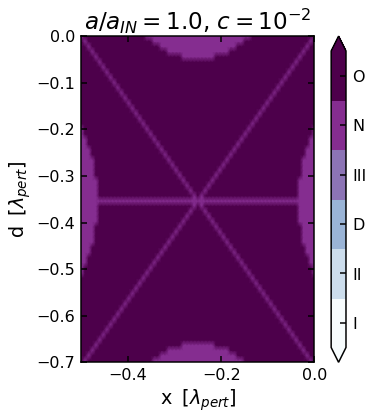

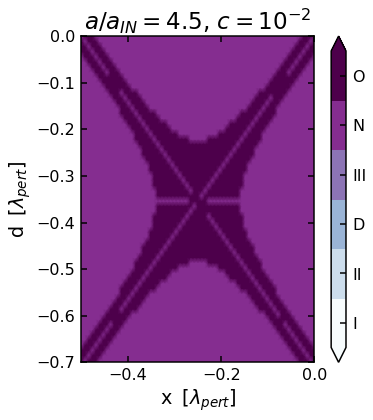

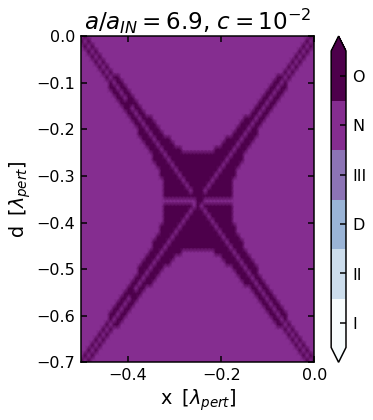

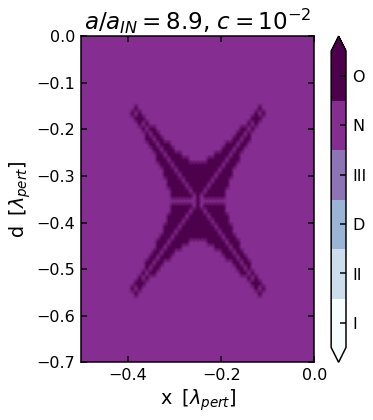

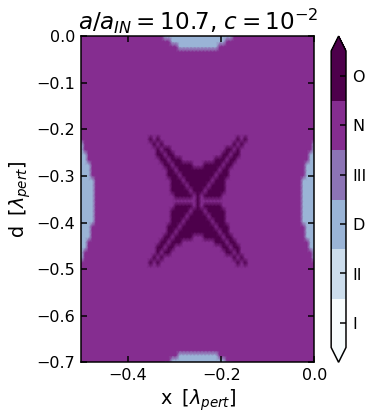

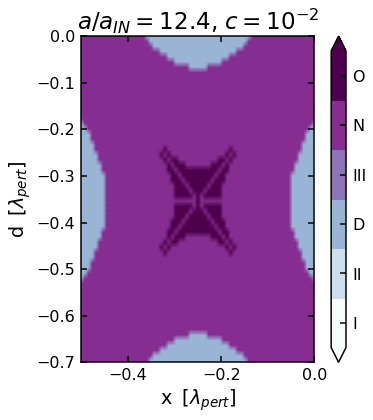

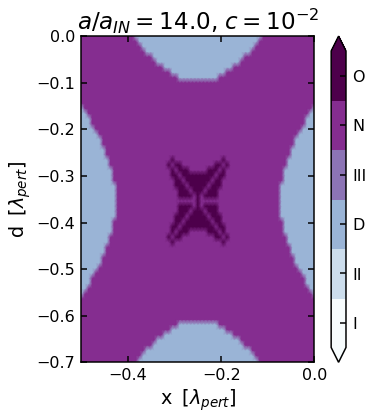

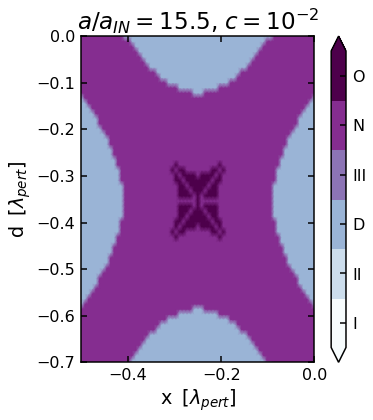

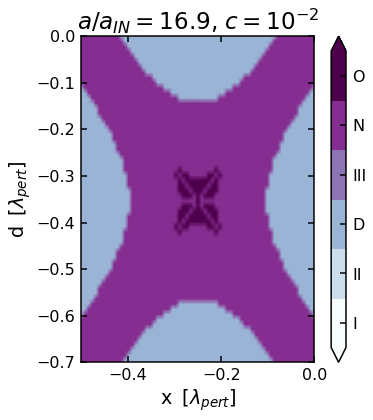

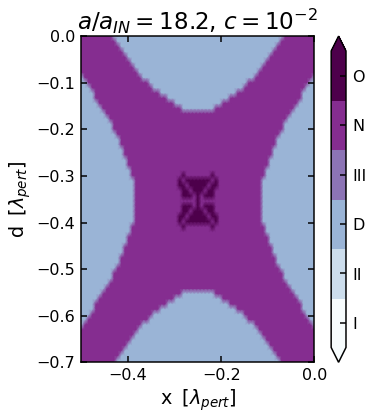

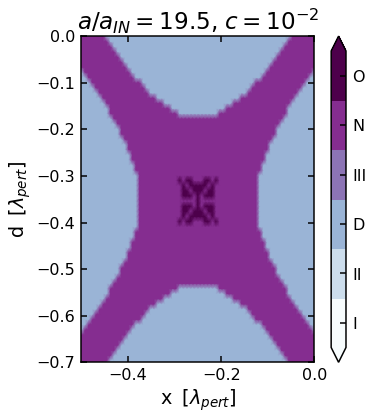

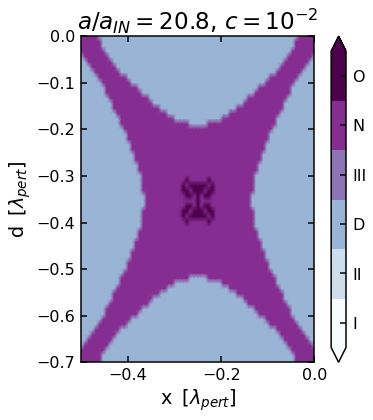

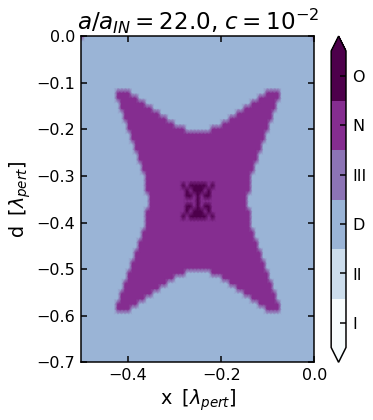

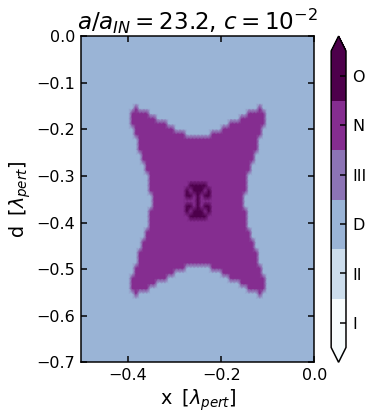

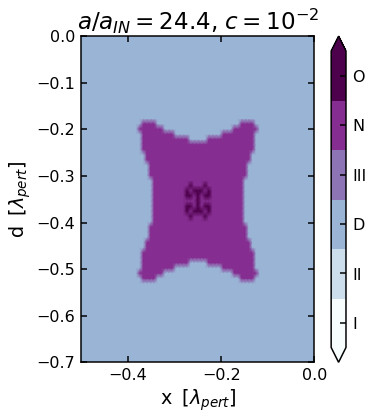

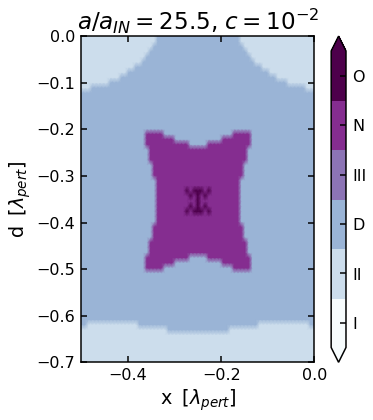

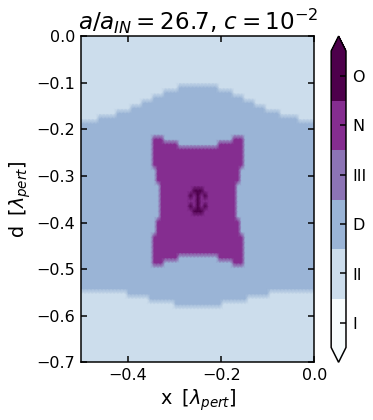

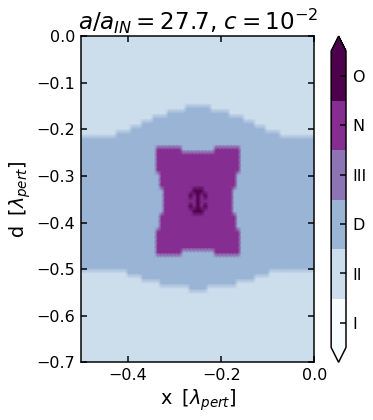

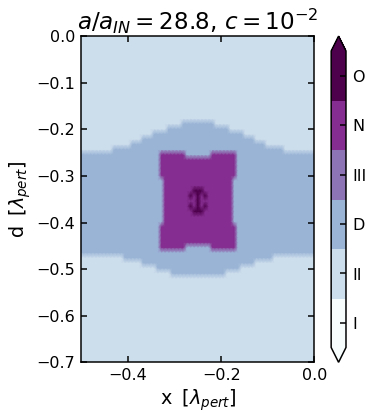

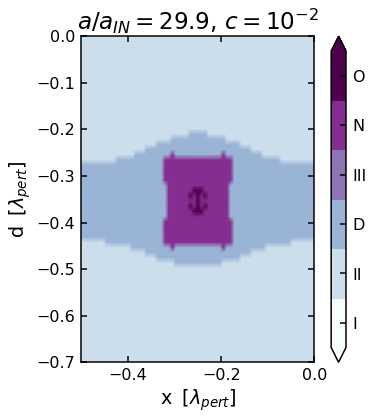

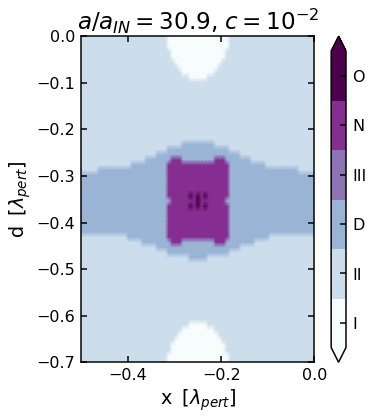

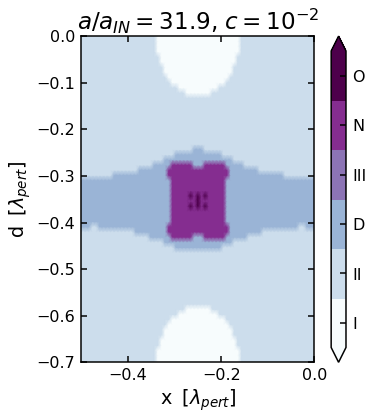

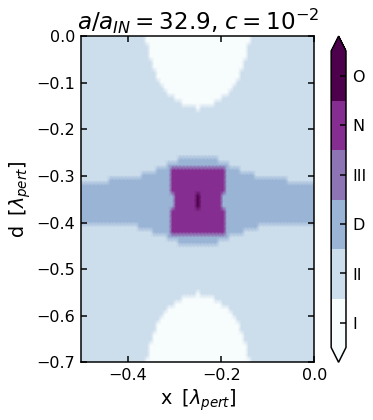

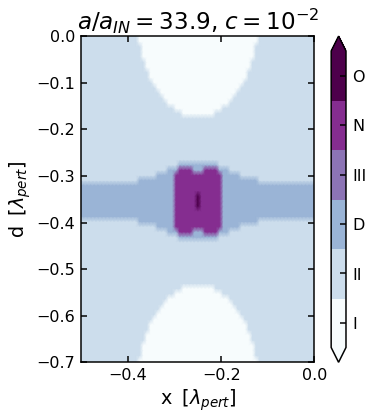

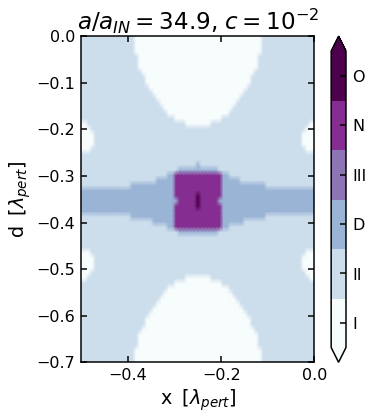

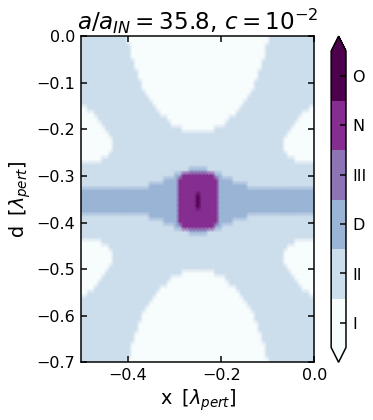

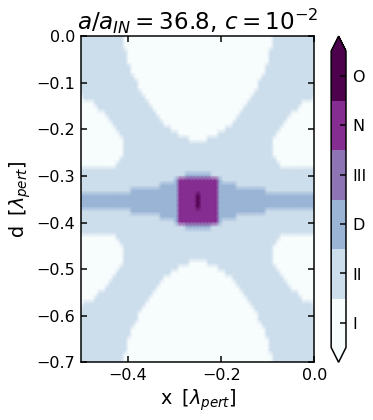

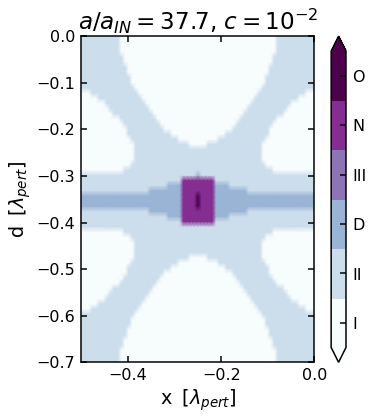

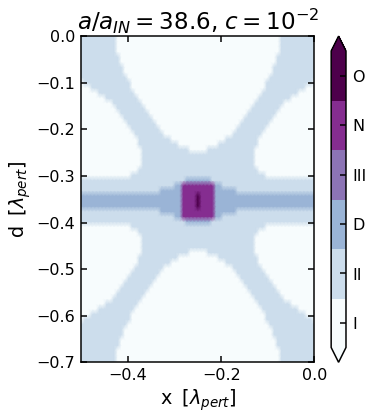

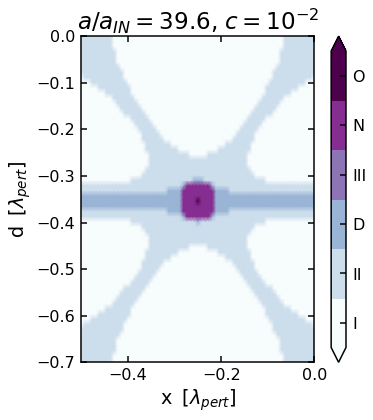

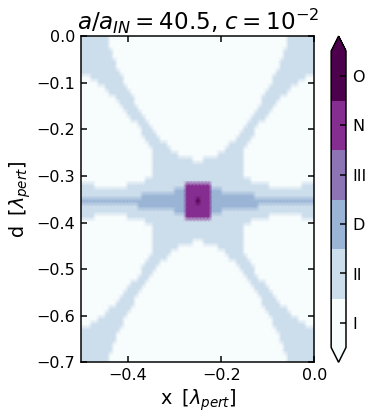

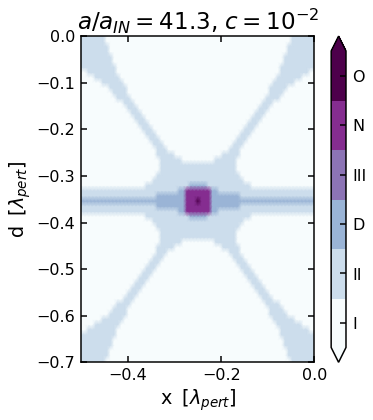

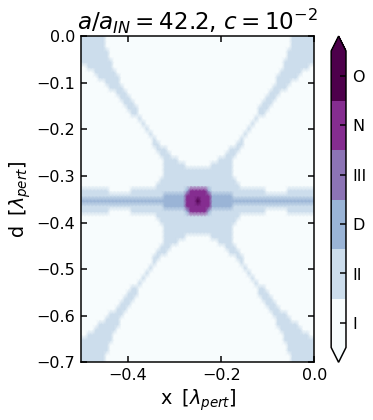

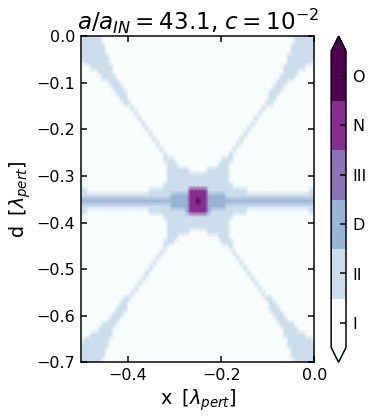

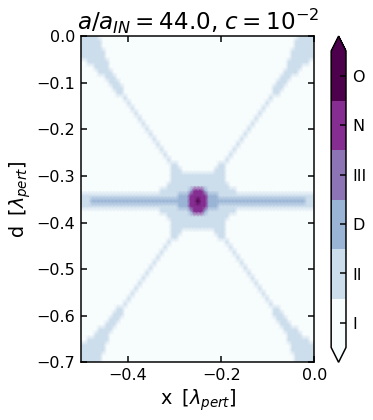

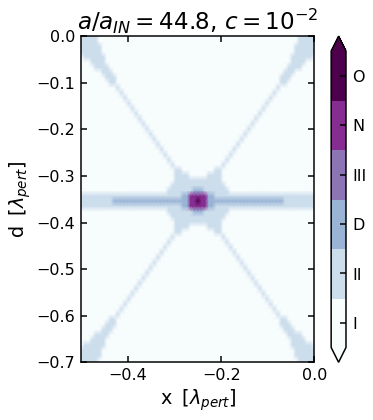

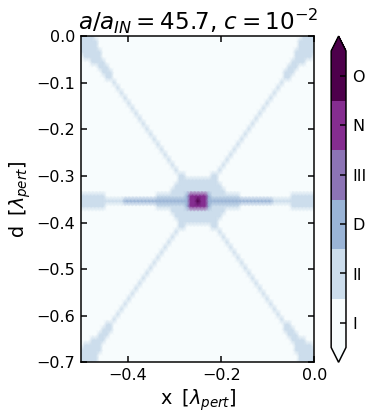

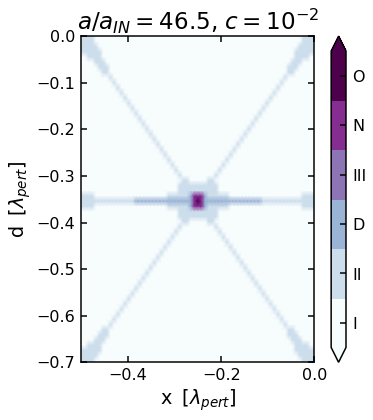

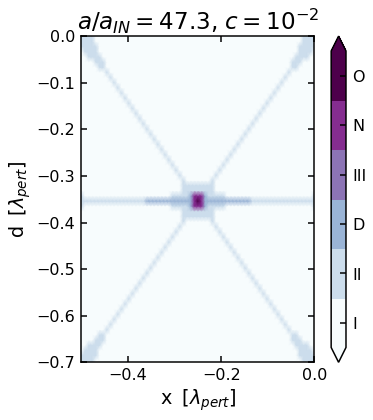

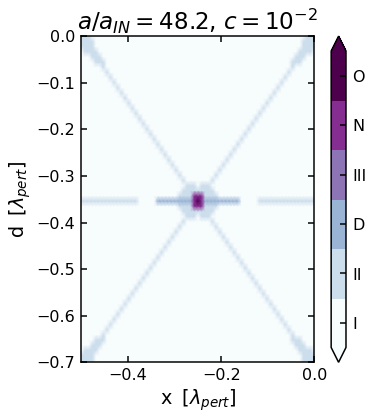

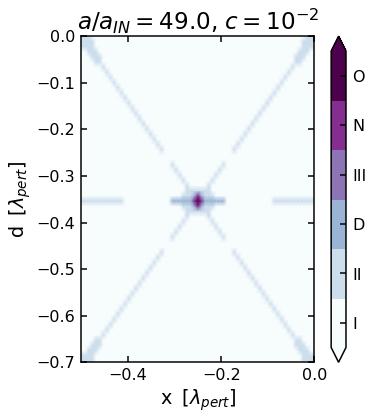

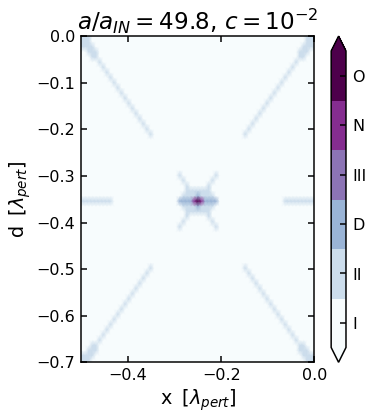

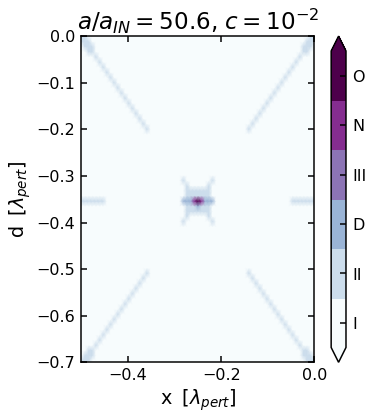

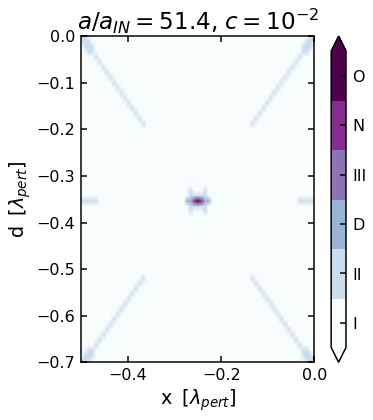

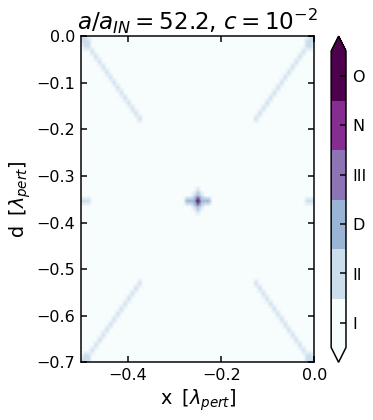

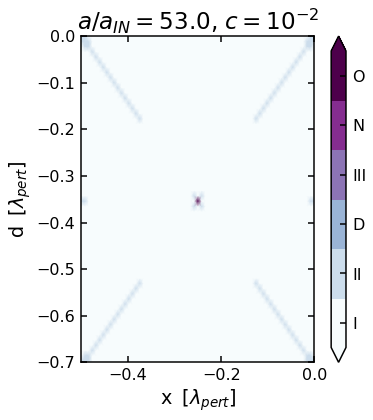

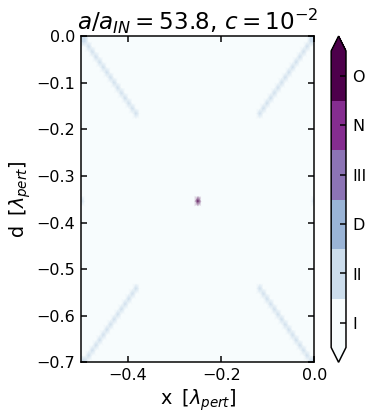

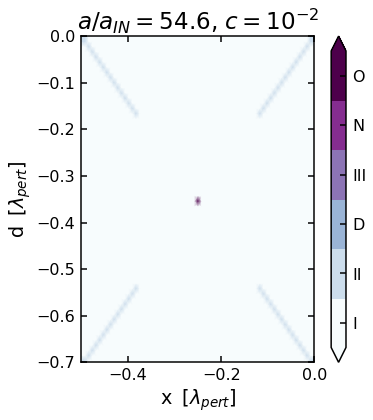

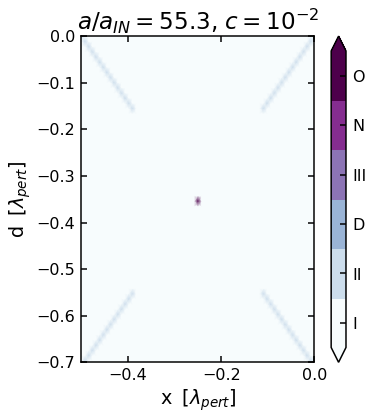

In [66]:
for it in allit:
    invar_dict = h5py.File(invar_path+'{:06d}.hdf5'.format(it), 'r')
    H = Lin128.temp_from_temp('H', 'it', it)
    dE = abs(invar_dict['|E|']/H**2)
    dB = abs(invar_dict['|B|']/H**2)
    dS = abs(np.array(invar_dict['S']))
    I = np.array(invar_dict['I'])
    J = np.array(invar_dict['J'])
    Scrit = I*I*I-27*J*J
    dScrit = abs(Scrit/H**12)
    dI = abs(I/H**4)
    dJ = abs(J/H**6)
    dLS = abs(np.array(invar_dict['LS'])/H**4)
    dK = abs(np.array(invar_dict['K'])/H**6)
    dN = abs(np.array(invar_dict['N'])/H**8)
    
    Petrov_class = np.copy(dS)
    cutoff = 1e-2
    for i in range(np.shape(dS)[0]):
        for j in range(np.shape(dS)[1]):
            if dScrit[i,j]<cutoff:
                if dI[i,j]<cutoff and dJ[i,j]<cutoff:
                    if dK[i,j]<cutoff and dLS[i,j]<cutoff:
                        if dE[i,j]<cutoff and dB[i,j]<cutoff:
                            Petrov_class[i,j]=6 #type O
                        else:
                            Petrov_class[i,j]=5 #type N
                    else:
                        Petrov_class[i,j]=4 #type III
                else:
                    if dK[i,j]<cutoff and dN[i,j]<cutoff:
                        Petrov_class[i,j]=3 #type D
                    else:
                        Petrov_class[i,j]=2 #type II
            else:
                Petrov_class[i,j]=1 #type I

    fig, ax = plt.subplots(figsize=(6,6))
    cmap = plt.cm.get_cmap('BuPu', 6)
    plt.pcolormesh(Lin128.d3xyz/sim128.L, Lin128.d3xyz*np.sqrt(2)/sim128.L, Petrov_class, cmap=cmap, vmin=0.5, vmax=6.5, shading='gouraud')
    plt.gca().set_aspect("equal")
    cbar = plt.colorbar(extend='both', ticks=[1, 2, 3, 4, 5, 6])
    cbar.ax.set_yticklabels(['I', 'II', 'D', 'III', 'N', 'O'])
    plt.title(r'$a/a_{IN}=$'+'{:.1f}, '.format(Lin128.temp_from_temp('an', 'it', it))+r'$c=10^{-2}$')
    plt.ylabel('d'+r'$\;\;[\lambda_{pert}]$')
    plt.xlabel('x'+r'$\;\;[\lambda_{pert}]$')
    plt.xlim(-0.5, 0)
    plt.ylim(-0.7, 0)
    plt.savefig('/home/robynm/simulations/'+sim128.sim_name+'/plots/Petrov/Petrov_cut_{:.0e}_it={:06d}.jpg'.format(cutoff, it))

In [5]:
def plot(data, m):
    #data = np.array([data[:, j, j] for j in range(Lin128.N)])
    cmap = plt.cm.get_cmap('inferno', 14)
    try:
        data[32,32] = m
        data[96,96] = m
        plt.pcolormesh(Lin128.d3xyz/sim128.L, Lin128.d3xyz*np.sqrt(2)/sim128.L, data, cmap=cmap, shading='gouraud')
        plt.gca().set_aspect("equal")
        plt.colorbar(extend='both')
    except:
        plt.pcolormesh(Lin128.d3xyz/sim128.L, Lin128.d3xyz*np.sqrt(2)/sim128.L, data, cmap=cmap, shading='gouraud')
        plt.gca().set_aspect("equal")
        plt.colorbar(extend='both')
    

In [5]:
invar_dict = h5py.File(invar_path+'{:06d}.hdf5'.format(it), 'r')

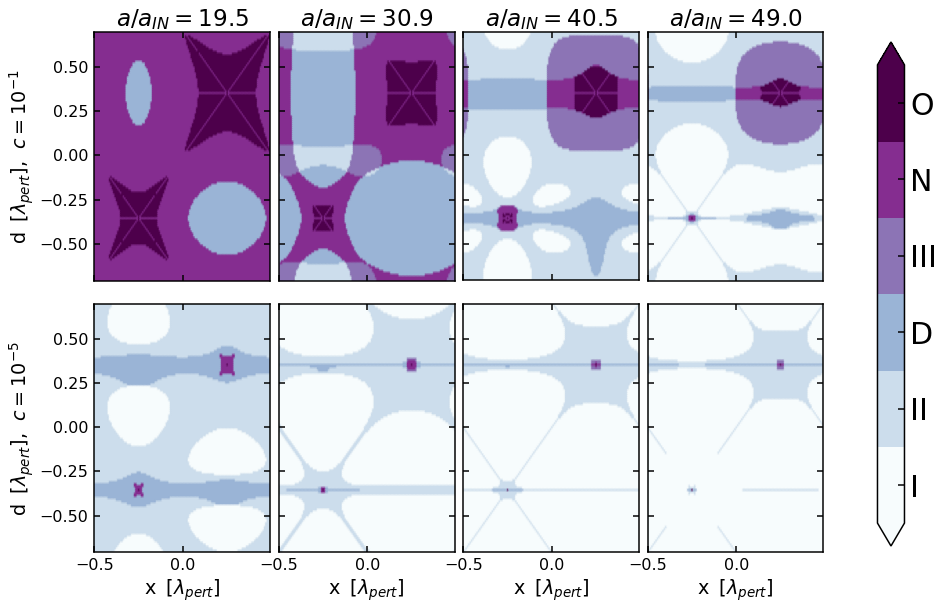

In [67]:
fig = plt.figure(figsize=(15,10))
pltnbr = 1
cmap = plt.cm.get_cmap('BuPu', 6)
for cutoff in [1e-1, 1e-5]:
    for it in [10000,20000,30000,40000]:
        invar_dict = h5py.File(invar_path+'{:06d}.hdf5'.format(it), 'r')
        H = Lin128.temp_from_temp('H', 'it', it)
        dE = abs(invar_dict['|E|']/H**2)
        dB = abs(invar_dict['|B|']/H**2)
        dS = abs(np.array(invar_dict['S']))
        I = np.array(invar_dict['I'])
        J = np.array(invar_dict['J'])
        Scrit = I*I*I-27*J*J
        dScrit = abs(Scrit/H**12)
        dI = abs(I/H**4)
        dJ = abs(J/H**6)
        dLS = abs(np.array(invar_dict['LS'])/H**4)
        dK = abs(np.array(invar_dict['K'])/H**6)
        dN = abs(np.array(invar_dict['N'])/H**8)

        Petrov_class = np.copy(dS)
    
        for i in range(np.shape(dS)[0]):
            for j in range(np.shape(dS)[1]):
                if dScrit[i,j]<cutoff:
                    if dI[i,j]<cutoff and dJ[i,j]<cutoff:
                        if dK[i,j]<cutoff and dLS[i,j]<cutoff:
                            if dE[i,j]<cutoff and dB[i,j]<cutoff:
                                Petrov_class[i,j]=6 #type O
                            else:
                                Petrov_class[i,j]=5 #type N
                        else:
                            Petrov_class[i,j]=4 #type III
                    else:
                        if dK[i,j]<cutoff and dN[i,j]<cutoff:
                            Petrov_class[i,j]=3 #type D
                        else:
                            Petrov_class[i,j]=2 #type II
                else:
                    Petrov_class[i,j]=1 #type I

        ax = plt.subplot(240+pltnbr)        
        im = plt.pcolormesh(Lin128.d3xyz/sim128.L, Lin128.d3xyz*np.sqrt(2)/sim128.L, Petrov_class, cmap=cmap, vmin=0.5, vmax=6.5, shading='gouraud')
        plt.gca().set_aspect("equal")
        
        if pltnbr==1:
            plt.ylabel('d'+r'$\;\;[\lambda_{pert}]$'+',  '+r'$c=10^{-1}$')
        elif pltnbr==5:
            plt.ylabel('d'+r'$\;\;[\lambda_{pert}]$'+',  '+r'$c=10^{-5}$')
        else:
            ax.set_yticklabels(())
            
        if pltnbr<5:
            plt.title(r'$a/a_{IN}=$'+'{:.1f}'.format(Lin128.temp_from_temp('an', 'it', it)))
            ax.set_xticklabels(())
        else:
            plt.xlabel('x'+r'$\;\;[\lambda_{pert}]$')
        pltnbr+=1
fig.subplots_adjust(right=0.8, wspace=0.05, hspace=0)
cbar_ax = fig.add_axes([0.85, 0.15, 0.025, 0.7])
cbar = fig.colorbar(im, ticks=[1, 2, 3, 4, 5, 6], extend='both', cax=cbar_ax) 
cbar.ax.set_yticklabels(['I', 'II', 'D', 'III', 'N', 'O'], fontsize=30)
plt.savefig('/home/robynm/simulations/'+sim128.sim_name+'/plots/Petrov/Petrov_group.pdf')

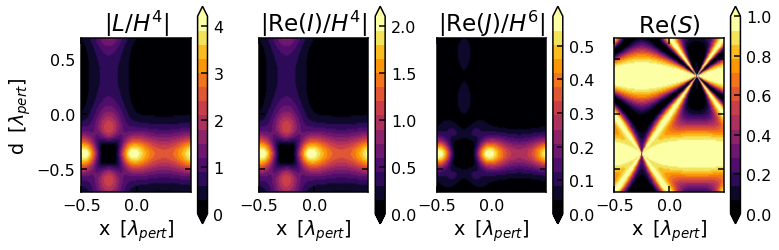

In [7]:
H = Lin128.temp_from_temp('H', 'it', it)

fig = plt.figure(figsize=(12,4))
ax1 = plt.subplot(141)
plot(abs(invar_dict['L']/H**4), 0)
plt.title(r'|$L/H^4|$')
plt.ylabel('d'+r'$\;\;[\lambda_{pert}]$')
plt.xlabel('x'+r'$\;\;[\lambda_{pert}]$')

ax3 = plt.subplot(142)
plot(abs(invar_dict['Re(I)']/H**4), 0)
plt.title(r'|Re$(I)/H^4|$')
ax3.set_yticklabels(())
plt.xlabel('x'+r'$\;\;[\lambda_{pert}]$')

ax5 = plt.subplot(143)
plot(abs(invar_dict['Re(J)']/H**6), 0)
plt.title(r'|Re$(J)/H^6|$')
ax5.set_yticklabels(())
plt.xlabel('x'+r'$\;\;[\lambda_{pert}]$')

ax7 = plt.subplot(144)
plot(invar_dict['Re(S)'], 0)
plt.title(r'Re($S)$')
ax7.set_yticklabels(())
plt.xlabel('x'+r'$\;\;[\lambda_{pert}]$')

plt.subplots_adjust(wspace=0.3)#, top=0.9, bottom=0.05)
plt.savefig('/home/robynm/simulations/'+sim128.sim_name+'/plots/invar.pdf')